In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

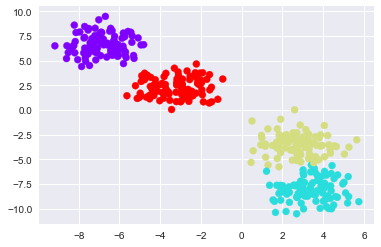

In [9]:
from sklearn import datasets

X,y = datasets.make_blobs(n_samples = 400, n_features = 2, centers = 4)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow') # color c refer to class y

In [5]:
from sklearn import tree
import numpy

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

np.unique(y[:])

array([0, 1])

In [15]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    print(xlim)
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

(-9.925708517333659, 6.501965459379047)


C:\Users\MIKA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


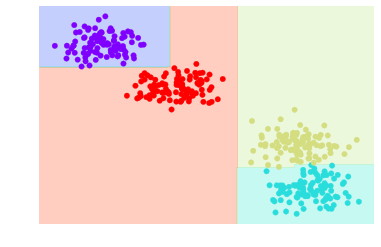

In [16]:
visualize_classifier(tree.DecisionTreeClassifier(), X, y)

C:\Users\MIKA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\MIKA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\MIKA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\MIKA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


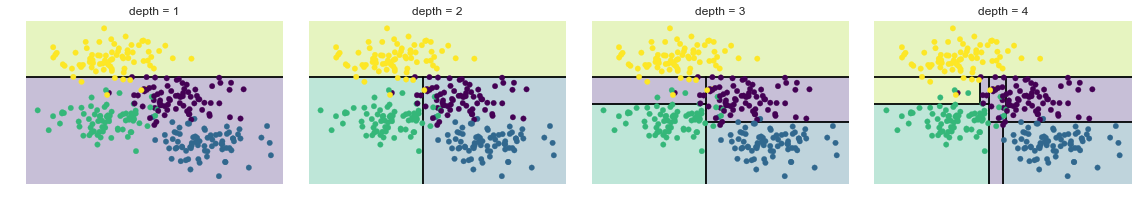

In [32]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

(-4.6223371064746015, 4.7954450743727755)


C:\Users\MIKA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


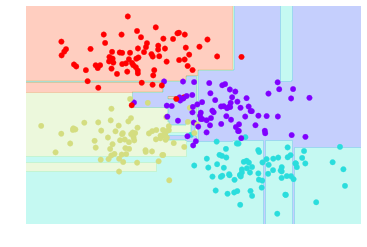

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=2, random_state=0)
visualize_classifier(model, X, y);

[0, 1, 0, 1]

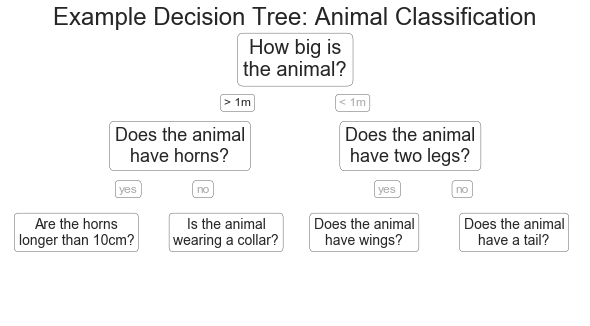

In [27]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree: Animal Classification', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "How big is\nthe animal?", 20)
text(ax, 0.3, 0.6, "Does the animal\nhave horns?", 18)
text(ax, 0.7, 0.6, "Does the animal\nhave two legs?", 18)
text(ax, 0.12, 0.3, "Are the horns\nlonger than 10cm?", 14)
text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
text(ax, 0.62, 0.3, "Does the animal\nhave wings?", 14)
text(ax, 0.88, 0.3, "Does the animal\nhave a tail?", 14)

text(ax, 0.4, 0.75, "> 1m", 12)
text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)

text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

ax.axis([0, 1, 0, 1])

In [4]:
import graphviz

#dot_data = tree.export_graphviz(clf, out_file=None) 
feature = ['length', 'width']
classe = {0: 'CLASS 1', 1: 'CLASS 2'}

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = feature,  
                         class_names = classe,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [5]:
import os
os.environ["PATH"]
#os.environ["PATH"] += os.pathsep + 'C:/Users/MIKA/Anaconda3/pkgs/graphviz-2.38.0-4/Library/bin'

'C:\\Users\\MIKA\\Anaconda3\\Library\\bin;C:\\ProgramData\\Oracle\\Java\\javapath;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\Intel\\WiFi\\bin\\;C:\\Program Files\\Common Files\\Intel\\WirelessCommon\\;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files (x86)\\Skype\\Phone\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Users\\MIKA\\Anaconda3\\pkgs\\graphviz-2.38.0-4\\Library\\bin\\;C:\\Users\\MIKA\\Anaconda3\\Scripts;C:\\Users\\MIKA\\AppData\\Local\\Microsoft\\WindowsApps;;C:\\Users\\MIKA\\Anaconda3\\lib\\site-packages\\numpy\\.libs'